In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
df = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
#Handle missing values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [49]:
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean


In [50]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]


In [51]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns)
df_scaled


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.707275,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,1.708139,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,1.709004,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,1.709869,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


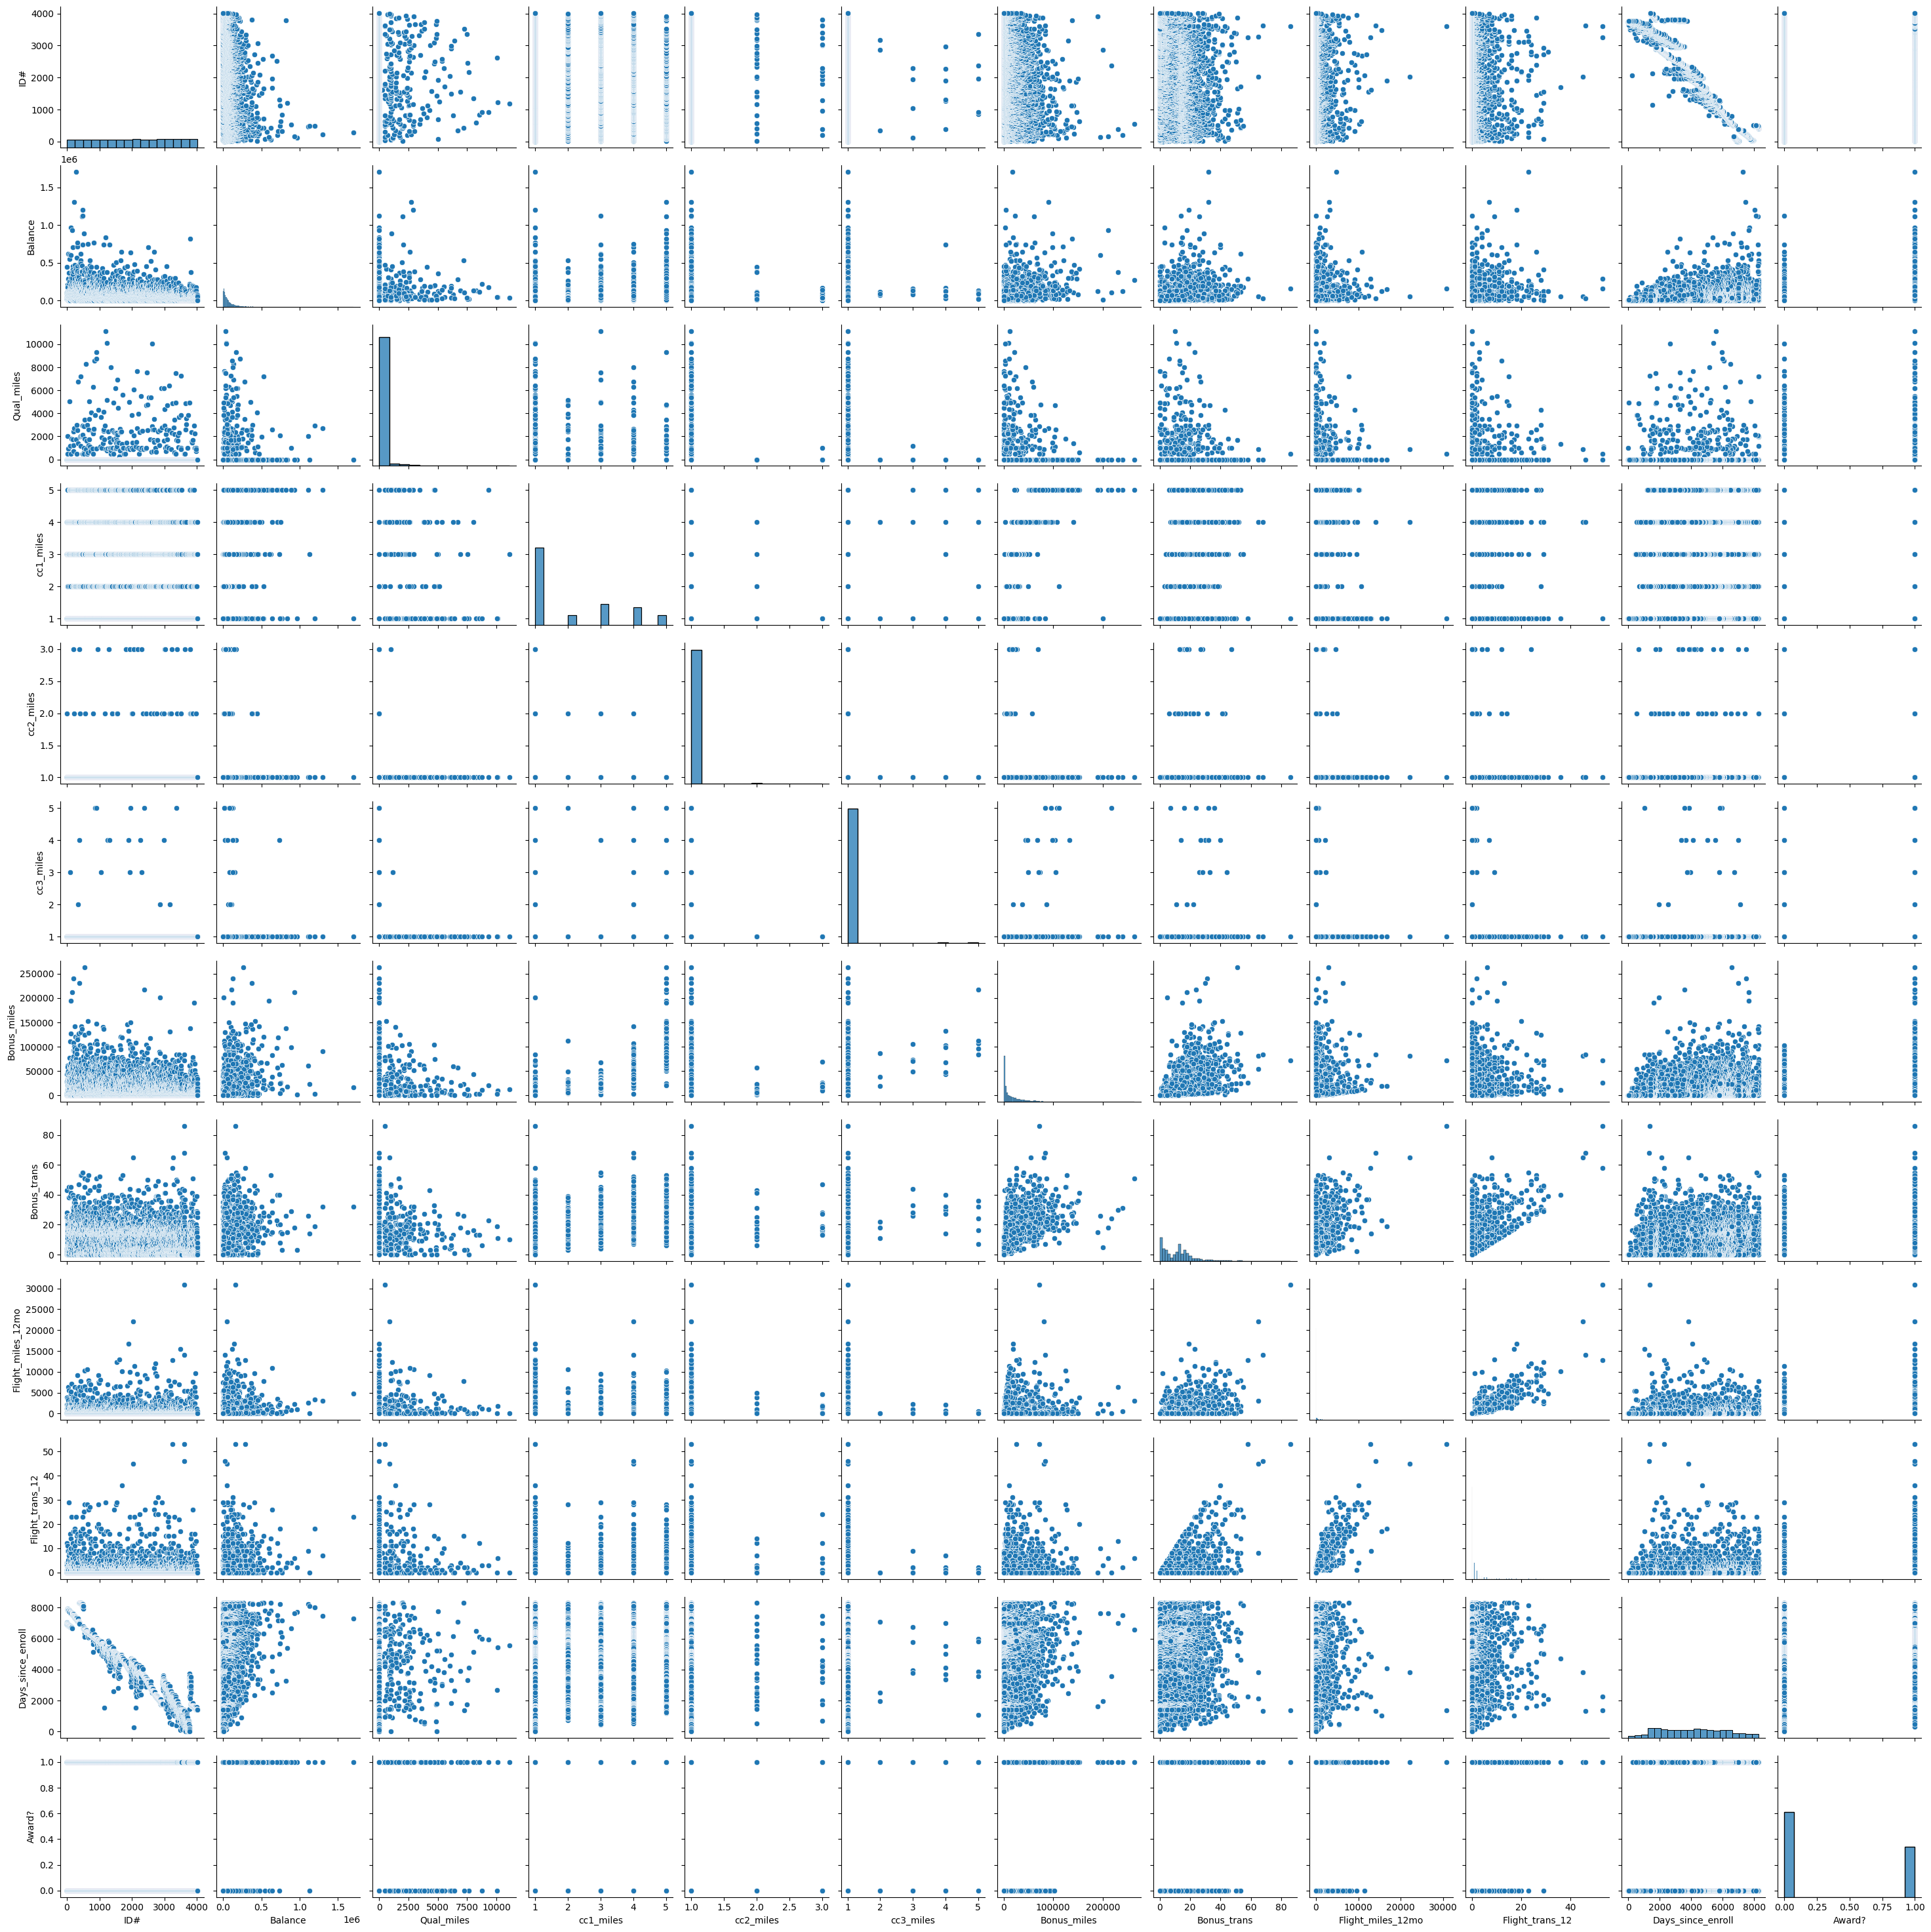

In [52]:
#Visualize dada distribution
sns.pairplot(df)
plt.show()

In [53]:
#sns.pairplot(df_scaled)
#plt.show()

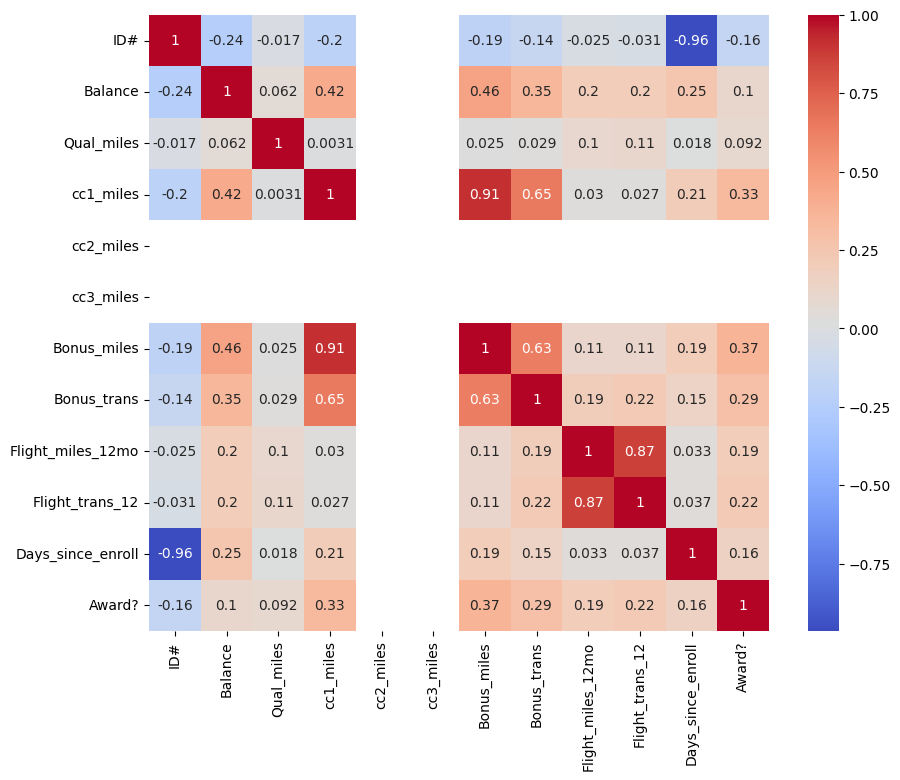

In [54]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [55]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca


,PC1,PC2
0,-0.824196,-1.733767
1,-0.827534,-1.721163
2,-0.500915,-1.729560
3,-0.896341,-1.725499
4,4.551581,1.404738
...,...,...
3625,-1.478427,1.341970
3626,-1.545283,0.878900
3627,-0.051807,0.650840
3628,-2.117154,1.414077


In [56]:
#k-Means
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

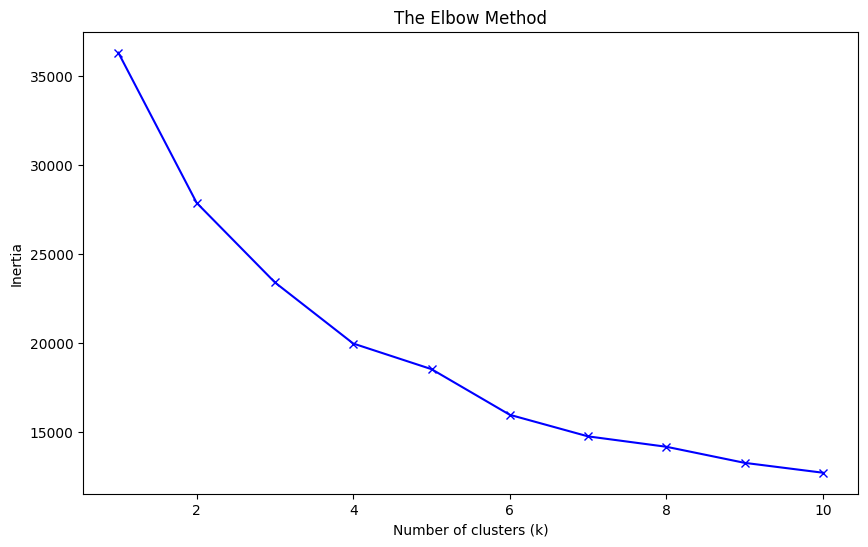

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

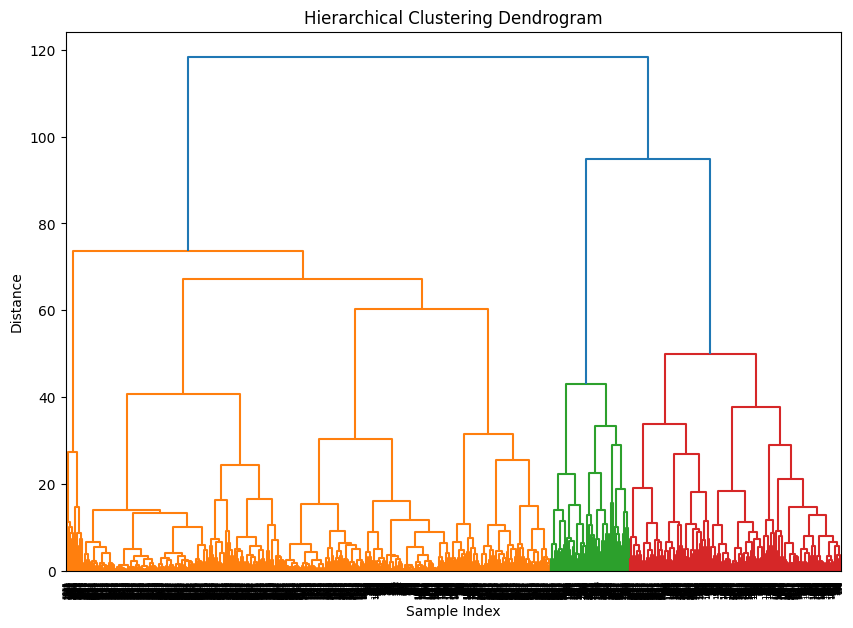

In [58]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [59]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_labels
dbscan.fit(df_scaled)

DBSCAN()

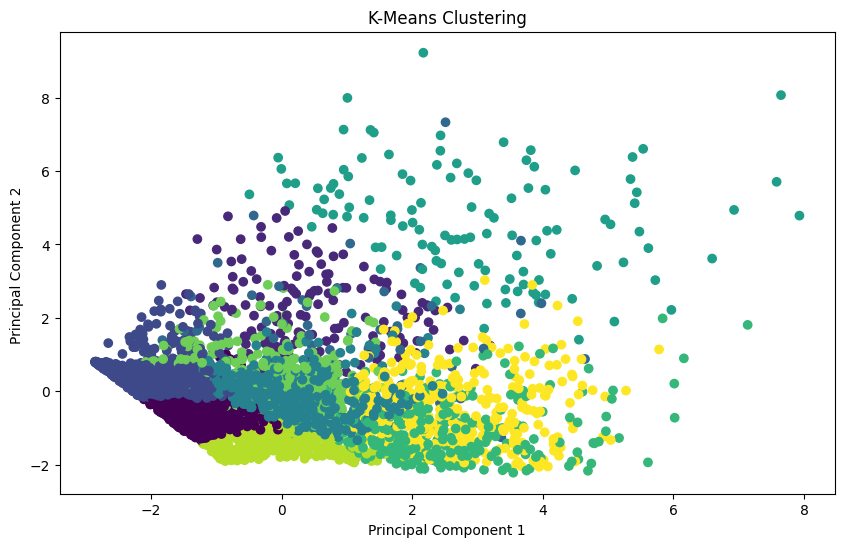

In [60]:
#Visualization
#K-Means Clustering Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2 ')
plt.show()

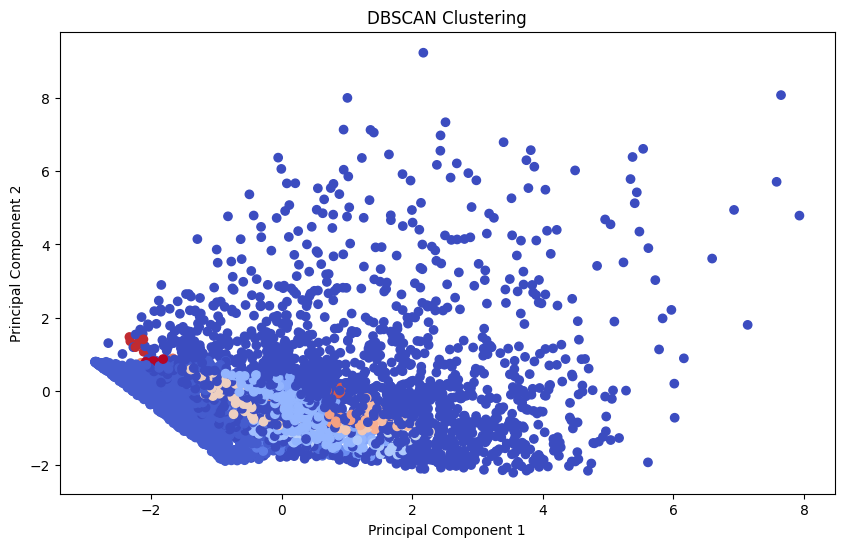

In [61]:
#DBSCAN Clustering Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [62]:
#Silhoutte Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, kmeans.labels_)
silhouette_kmeans

np.float64(0.21437995962064127)

In [63]:
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print("Silhouette Score (DBSCAN):", silhouette_dbscan)
else:
    print("DBSCAN did not produce distinct clusters.")


Silhouette Score (DBSCAN): -0.3994552312980999
